<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#multiple-linear-regression" data-toc-modified-id="multiple-linear-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>multiple linear regression</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#construct-predict-function" data-toc-modified-id="construct-predict-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>construct predict function</a></span></li><li><span><a href="#Compute-cost-function-with-multiple-variables" data-toc-modified-id="Compute-cost-function-with-multiple-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compute cost function with multiple variables</a></span></li><li><span><a href="#Gradient-descent-with-multiple-variables" data-toc-modified-id="Gradient-descent-with-multiple-variables-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gradient descent with multiple variables</a></span></li><li><span><a href="#feature-scaling" data-toc-modified-id="feature-scaling-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>feature scaling</a></span><ul class="toc-item"><li><span><a href="#compare-between-X_norm-and-X_train" data-toc-modified-id="compare-between-X_norm-and-X_train-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>compare between X_norm and X_train</a></span><ul class="toc-item"><li><span><a href="#X_train" data-toc-modified-id="X_train-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>X_train</a></span></li><li><span><a href="#X_norm" data-toc-modified-id="X_norm-1.5.1.2"><span class="toc-item-num">1.5.1.2&nbsp;&nbsp;</span>X_norm</a></span></li></ul></li><li><span><a href="#note-learning-rate,-alpha" data-toc-modified-id="note-learning-rate,-alpha-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>note learning rate, alpha</a></span></li></ul></li></ul></li><li><span><a href="#linear-regression-with-scikit-learn-library" data-toc-modified-id="linear-regression-with-scikit-learn-library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>linear regression with scikit learn library</a></span><ul class="toc-item"><li><span><a href="#sklearn---gradient-descent-solution" data-toc-modified-id="sklearn---gradient-descent-solution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>sklearn - gradient descent solution</a></span><ul class="toc-item"><li><span><a href="#load-the-dataset" data-toc-modified-id="load-the-dataset-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>load the dataset</a></span></li><li><span><a href="#normalize-the-training-data" data-toc-modified-id="normalize-the-training-data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>normalize the training data</a></span></li><li><span><a href="#Create-and-fit-the-regression-model" data-toc-modified-id="Create-and-fit-the-regression-model-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Create and fit the regression model</a></span></li><li><span><a href="#View-parameters" data-toc-modified-id="View-parameters-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>View parameters</a></span></li><li><span><a href="#Make-predictions" data-toc-modified-id="Make-predictions-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Make predictions</a></span></li><li><span><a href="#plot-results" data-toc-modified-id="plot-results-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>plot results</a></span></li></ul></li><li><span><a href="#sklearn---normal-equation" data-toc-modified-id="sklearn---normal-equation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>sklearn - normal equation</a></span><ul class="toc-item"><li><span><a href="#create-and-fit-model" data-toc-modified-id="create-and-fit-model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>create and fit model</a></span></li></ul></li></ul></li></ul></div>

# multiple linear regression


Reference: Andrew Ng's Supervised Machine Learning: Regression and Classification course on Coursera

In [1]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision (number of digits) on numpy arrays

## Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])    # capital letter for matrix, small letter for vectors and scalar

In [3]:
print(f'X_train.shape: {X_train.shape}, X_train type: {type(X_train)}, \n{X_train}')
print(f'\ny_train.shape: {y_train.shape}, y_train type: {type(y_train)}, \n{y_train}')

X_train.shape: (3, 4), X_train type: <class 'numpy.ndarray'>, 
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]

y_train.shape: (3,), y_train type: <class 'numpy.ndarray'>, 
[460 232 178]


## construct predict function

In [4]:
def predict(X,w,b):
    """
    single predict using linear regression
    Args:
    x (ndarray): Shape (n,) example with multiple features
    w (ndarray): Shape (n,) model parameters   
    b (scalar):             model parameter 
      
    Returns:
    p (scalar):  prediction
    """
    p = np.dot(X,w) + b
    return p

In [5]:
# initialise w and b

b_init = 0
w_init = np.zeros(X_train.shape[1])

In [6]:
#test function
predict(X_train[0,:], w_init, b_init)

0.0

## Compute cost function with multiple variables

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [7]:
def compute_cost(X,y,w,b):
    """
    Compute cost
    Args:
    X (ndarray(m,n)): training data, with m samples and n features
    y (ndarray(m,)): target values for each sample m
    w (ndarray(n,)): model parameters, weightage
    b (scalar): model parameter, bias
    
    return:
    cost (scalar): cost
    """
    m,n = X.shape
    cost = 0
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b    #(n,)(n,) = scalar (see np.dot)
        cost += (f_wb - y[i])**2
    cost = cost/ (2*m)
    return cost

In [8]:
# test function

compute_cost(X_train, y_train, w_init, b_init)

49518.0

## Gradient descent with multiple variables

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


**Compute gradient first**

In [9]:
def compute_gradient(X,y,w,b):
    """
    compute gradient of cost function
    Args:
    X (ndarray(m,n)): training data, with m samples and n features
    y (ndarray(m,)): target values for each sample m
    w (ndarray(n,)): model parameters, weightage
    b (scalar): model parameter, bias
    
    return:
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b.
    dj_dw (vector): The gradient of the cost w.r.t. the parameter w.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    for i in range(m):
        err = np.dot(X[i],w) + b -y[i]    # compute error between model predictions and target values
        for j in range(n):
            dj_dw_i = err * X[i,j]
            dj_dw[j] += dj_dw_i           # dj_dw is a vector
        dj_db += err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [10]:
# test function

compute_gradient(X_train, y_train, w_init, b_init)

(array([-4.83e+05, -1.12e+03, -3.67e+02, -1.21e+04]), -290.0)

**compute gradient descent**

In [11]:
def gradient_descent(X,y,w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    J_history = []    # empty array to store costs at each iteration
    w, b = w_in, b_in # reassign name as w and b so to not mess with w_in and b_in in iterations later
    
    # update parameters w and b
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X,y,w,b)     
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        # store the cost J of each iteration within a certain limit of iterations
        if i < 10000:
            J_history.append(cost_function(X,y,w,b))
            
        # print cost at selected intervals 
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
            
    return w, b, J_history

In [12]:
# test gradient_descent function

# set parameters
alpha = 5.0e-7
iterations = 20000
initial_w = np.zeros_like(w_init)
initial_b = 0

# run gradient descent

w_out, b_out, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                           compute_cost, compute_gradient, alpha, iterations)

# print result
print(f"w_out: {w_out}, b_out: {b_out: 0.2f}")

Iteration    0: Cost  2529.46   
Iteration 2000: Cost   677.19   
Iteration 4000: Cost   660.50   
Iteration 6000: Cost   646.49   
Iteration 8000: Cost   634.72   
Iteration 10000: Cost   624.83   
Iteration 12000: Cost   624.83   
Iteration 14000: Cost   624.83   
Iteration 16000: Cost   624.83   
Iteration 18000: Cost   624.83   
w_out: [ 0.23  0.06 -0.2  -0.95], b_out: -0.03


In [13]:
# linear regression to predict price,y given features, X

m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_out) + b_out:0.2f}, target value: {y_train[i]}")

prediction: 433.66, target value: 460
prediction: 282.29, target value: 232
prediction: 159.47, target value: 178


## feature scaling

For normalized variables, gradient descent can be carried out much more efficiently. 

In [14]:
def zscore_normalize_features(X):
    """
    normalize X_train to z scale
    Arg:
    X (ndarray(m,n)): data to be normalized
    
    return:
    X_norm (ndarray(m,n)): normalized data    
    """
     # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm, mu, sigma

In [15]:
X_norm, mu, sigma = zscore_normalize_features(X_train)

print(f"X_norm: {X_norm},\nmu: {mu},\nsigma:{sigma}")

X_norm: [[ 1.26  1.34 -0.71  1.22]
 [-0.08 -0.27  1.41  0.  ]
 [-1.18 -1.07 -0.71 -1.22]],
mu: [1.46e+03 3.33e+00 1.33e+00 4.00e+01],
sigma:[5.12e+02 1.25e+00 4.71e-01 4.08e+00]


**illustrate X_norm**

In [16]:
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")
    
    mu = np.mean(data); 
    std = np.std(data); 
    dist = norm.pdf(bins, loc=mu, scale = std)
    
    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

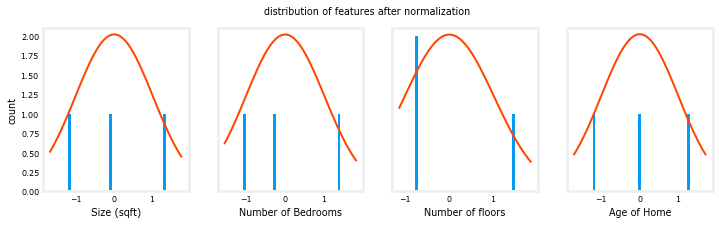

In [17]:
fig, ax = plt.subplots(1,4, figsize=(12,3),sharey=True)
X_features = ["Size (sqft)", "Number of Bedrooms", "Number of floors", "Age of Home"]

from scipy.stats import norm

for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()

### compare between X_norm and X_train

#### X_train

In [18]:
# test gradient_descent function

# set parameters
alpha = 5.0e-7
iterations = 20000
initial_w = np.zeros_like(w_init)
initial_b = 0

# run gradient descent

w_out, b_out, J_history = gradient_descent(X_train, y_train, initial_w, initial_b, 
                                           compute_cost, compute_gradient, alpha, iterations)

# print result
print(f"w_out: {w_out}, b_out: {b_out: 0.2f}")

Iteration    0: Cost  2529.46   
Iteration 2000: Cost   677.19   
Iteration 4000: Cost   660.50   
Iteration 6000: Cost   646.49   
Iteration 8000: Cost   634.72   
Iteration 10000: Cost   624.83   
Iteration 12000: Cost   624.83   
Iteration 14000: Cost   624.83   
Iteration 16000: Cost   624.83   
Iteration 18000: Cost   624.83   
w_out: [ 0.23  0.06 -0.2  -0.95], b_out: -0.03


In [19]:
# linear regression to predict price,y given features, X

m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_out) + b_out:0.2f}, target value: {y_train[i]}")

prediction: 433.66, target value: 460
prediction: 282.29, target value: 232
prediction: 159.47, target value: 178


#### X_norm

In [20]:
# test gradient_descent function

# set parameters
alpha = 1e-7
iterations = 20000
initial_w = np.zeros_like(w_init)
initial_b = 0

# run gradient descent

w_out_norm, b_out_norm, J_history = gradient_descent(X_norm, y_train, initial_w, initial_b, 
                                           compute_cost, compute_gradient, alpha, iterations)

# print result
print(f"w_out_norm: {w_out_norm}, b_out_norm: {b_out_norm: 0.2f}")

Iteration    0: Cost 49517.99   
Iteration 2000: Cost 49492.52   
Iteration 4000: Cost 49467.07   
Iteration 6000: Cost 49441.63   
Iteration 8000: Cost 49416.22   
Iteration 10000: Cost 49390.83   
Iteration 12000: Cost 49390.83   
Iteration 14000: Cost 49390.83   
Iteration 16000: Cost 49390.83   
Iteration 18000: Cost 49390.83   
w_out_norm: [ 0.23  0.24 -0.08  0.23], b_out_norm:  0.58


In [21]:
# linear regression to predict price,y given features, X

m,_ = X_norm.shape

print("X_train:")
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_out) + b_out:0.2f}, target value: {y_train[i]}")

print("\nX_norm:")
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_out_norm) + b_out_norm:0.2f}, target value: {y_train[i]}")

X_train:
prediction: 433.66, target value: 460
prediction: 282.29, target value: 232
prediction: 159.47, target value: 178

X_norm:
prediction: 1.54, target value: 460
prediction: 0.38, target value: 232
prediction: -0.18, target value: 178


**TIPS: the difference is can be fixed by adjusting the learning rate, alpha.**

### note learning rate, alpha

With variables of different scale, learning rate needs to be adjusted accordingly.
- the larger the variables, the smaller the learning rate
- the smaller the variables, the larger the learning rate

Best practice: start with larger alpha where gradient descent turns out `nan` values and gradually reduce from there

In [22]:
# test gradient_descent function

# set parameters
alpha = 0.1
iterations = 1000
initial_w = np.zeros_like(w_init)
initial_b = 0

# run gradient descent

w_out_norm, b_out_norm, J_history = gradient_descent(X_norm, y_train, initial_w, initial_b, 
                                           compute_cost, compute_gradient, alpha, iterations)

# print result
print(f"w_out_norm: {w_out_norm}, b_out_norm: {b_out_norm: 0.2f}")

Iteration    0: Cost 37840.46   
Iteration  100: Cost     0.00   
Iteration  200: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  700: Cost     0.00   
Iteration  800: Cost     0.00   
Iteration  900: Cost     0.00   
w_out_norm: [ 38.05  41.54 -30.99  36.34], b_out_norm:  290.00


In [23]:
# re-test the linear regression algorithm

print("X_train:")
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_out) + b_out:0.2f}, target value: {y_train[i]}")

print("\nX_norm:")
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_out_norm) + b_out_norm:0.2f}, target value: {y_train[i]}")

X_train:
prediction: 433.66, target value: 460
prediction: 282.29, target value: 232
prediction: 159.47, target value: 178

X_norm:
prediction: 460.00, target value: 460
prediction: 232.00, target value: 232
prediction: 178.00, target value: 178


# linear regression with scikit learn library

## sklearn - gradient descent solution

In [24]:
# import libraries
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

### load the dataset

In [39]:
# load data
from lab_utils_multi import  load_house_data

In [40]:
X_train_sk, y_train_sk = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

### normalize the training data

In [41]:
X_train_sk[5]

array([864.,   2.,   1.,  66.])

In [44]:
scaler = StandardScaler()

# normalize training data
scaler.fit(X_train)
X_norm_sk = scaler.transform(X_train)

In [45]:
# one-line alternative
X_norm_sk = scaler.fit_transform(X_train_sk)

In [48]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[2.45 2.41 2.12 2.45]


### Create and fit the regression model

In [57]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm_sk, y_train_sk)
print(sgdr)

SGDRegressor()


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [62]:
b_norm_sk = sgdr.intercept_
w_norm_sk = sgdr.coef_
print(f"model parameters:                   w: {w_norm_sk}, b:{b_norm_sk}")
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

model parameters:                   w: [110.24 -21.11 -32.52 -38.03], b:[363.15]
number of iterations completed: 132, number of weight updates: 13069.0


In [56]:
sgdr.t_

11089.0

### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [70]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm_sk)
print(f"Prediction on training set:\n{y_pred_sgd[:4]}" )

# make a prediction using w,b. 
y_pred = np.dot(X_norm_sk, w_norm_sk) + b_norm_sk  
print(f"\nPrediction on training set:\n{y_pred[:4]}" )

# check if they are the same
print(f"\nprediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

# check target values
print(f"\nTarget values \n{y_train_sk[:4]}")

Prediction on training set:
[295.16 485.92 389.58 492.09]

Prediction on training set:
[295.16 485.92 389.58 492.09]

prediction using np.dot() and sgdr.predict match: True

Target values 
[300.  509.8 394.  540. ]


### plot results

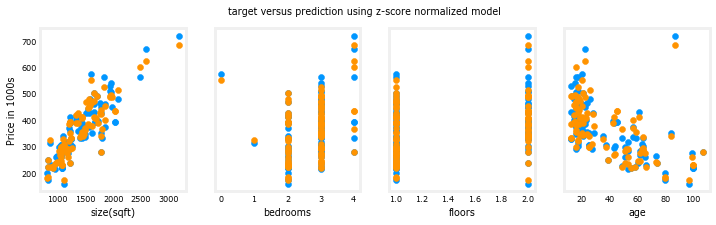

In [73]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train_sk[:,i], y_train_sk, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train_sk[:,i], y_pred_sgd, color = '#ff9300', label = 'predict')
ax[0].set_ylabel('Price in 1000s')
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

## sklearn - normal equation

Utilize  scikit-learn to implement linear regression using a close form solution based on the normal equation

In [74]:
from sklearn.linear_model import LinearRegression

### create and fit model

In [84]:
linear_model = LinearRegression()

In [88]:
# X must be a 2-D matrix
linear_model.fit(X_train_sk, y_train_sk)

LinearRegression()

In [94]:
# find out coef_ and intercept_ (w,b)
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [  0.27 -32.62 -67.25  -1.47], b = 220.42


In [93]:
# test regression model

x_test = np.array(X_train[0, :])
print(f"'manual' prediction: f_wb = wx+b : {np.dot(x_test,w) + b}")

'manual' prediction: f_wb = wx+b : 295.17615301448825
